# Real Estate vs Income Dashboard

In [8]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from panel.interact import interact
from dotenv import load_dotenv

In [9]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox_key")
px.set_mapbox_access_token(map_box_api)

In [10]:
# ZALL framework
prop_value_zall = pd.read_csv(Path("../data/clean_data/zillow_data_houston_sa_austin_dallas.csv"), header = 0, usecols = ["YEAR","AVG_PROP","ZIPCODE","CITY"], names = ["YEAR","REGION","AVG_PROP","ZIPCODE","CITY"], infer_datetime_format=True, parse_dates=True)[["YEAR","ZIPCODE","CITY","AVG_PROP"]]
prop_value_zall["YEAR"] = pd.DatetimeIndex(prop_value_zall["YEAR"]).year

avg_income_df = pd.read_csv(Path("../data/clean_data/avg_income.csv"), header = 0, names = ["YEAR","ZIPCODE","AVG_INCOME"], infer_datetime_format=True, parse_dates=True, dtype = {"avg_income" : np.float64})

lat_long_df = pd.read_excel(Path("../data/lat_long_by_zip_code.xlsx"), header = 0, usecols = ["Zip Code","Latitude","Longitude"])
lat_long_df = lat_long_df.rename(columns = {"Zip Code": "ZIPCODE", "Latitude": "LATITUDE" ,"Longitude": "LONGITUDE"})

zall_df = pd.merge(pd.merge(avg_income_df, prop_value_zall, how = "inner", on = ["YEAR", "ZIPCODE"]), lat_long_df, how = "inner", on = "ZIPCODE")

zall_df["OPPORTUNITY_RATIO"] = zall_df["AVG_INCOME"].astype(float) / zall_df["AVG_PROP"].astype(float)
zall_df = zall_df.groupby(["YEAR", "CITY", "ZIPCODE"], as_index = True).mean()


In [15]:
# RSNA framework
prop_value_rsna = pd.read_csv(Path("../data/clean_data/RSNA.csv"), header = 0, usecols = ["YEAR","AVG_PROP","ZIPCODE","CITY"], names = ["YEAR","REGION","AVG_PROP","ZIPCODE","CITY"], infer_datetime_format=True, parse_dates=True)[["YEAR","ZIPCODE","CITY","AVG_PROP"]]
prop_value_rsna["YEAR"] = pd.DatetimeIndex(prop_value_rsna["YEAR"]).year

rsna_df = pd.merge(pd.merge(avg_income_df, prop_value_rsna, how = "inner", on = ["YEAR", "ZIPCODE"]), lat_long_df, how = "inner", on = "ZIPCODE")
rsna_df["OPPORTUNITY_RATIO"] = rsna_df["AVG_INCOME"].astype(float) / rsna_df["AVG_PROP"].astype(float)
rsna_df = rsna_df.groupby(["YEAR", "CITY", "ZIPCODE"], as_index = True).mean()

In [17]:
# ZCON framework
prop_value_zcon = pd.read_csv(Path("../data/clean_data/ZCON.csv"), header = 0, usecols = ["YEAR","AVG_PROP","ZIPCODE","CITY"], names = ["YEAR","REGION","AVG_PROP","ZIPCODE","CITY"], infer_datetime_format=True, parse_dates=True)[["YEAR","ZIPCODE","CITY","AVG_PROP"]]
prop_value_zcon["YEAR"] = pd.DatetimeIndex(prop_value_zcon["YEAR"]).year

zcon_df = pd.merge(pd.merge(avg_income_df, prop_value_zcon, how = "inner", on = ["YEAR", "ZIPCODE"]), lat_long_df, how = "inner", on = "ZIPCODE")
zcon_df["OPPORTUNITY_RATIO"] = zcon_df["AVG_INCOME"].astype(float) / zcon_df["AVG_PROP"].astype(float)
zcon_df = zcon_df.groupby(["YEAR", "CITY", "ZIPCODE"], as_index = True).mean()

In [4]:
# may need to place variables here if panels don't play out

# Panel Visualizations

In [5]:
# Define Panel Visualization Functions
# each needs subdivision for ZALL, ZCON, & NSRA

# AGI V PROP 
def zall_agi_v_prop():
    """Average Income & ZALL Property Values 2007-2018"""
    
    all_time_IVP_city_df = zall_df.drop(["LATITUDE","LONGITUDE","OPPORTUNITY_RATIO"], axis=1)
    all_time_IVP_city_df = all_time_IVP_city_df.groupby("CITY").mean()

    city_gb_yr_plot= all_time_IVP_city_df.plot.bar(title="Average Income & Property Values 2007-2018")
    city_gb_yr_plot.set_ylabel("Amount in USD")
    return city_gb_yr_plot


# def average_rent_yr():


# def average_prop_value_yr():


# def average_condo_value_yr():


# def average_income_yr():


# def zipcode_map():
# for ZALL, ZCON, & NSRA


# def sunburst():


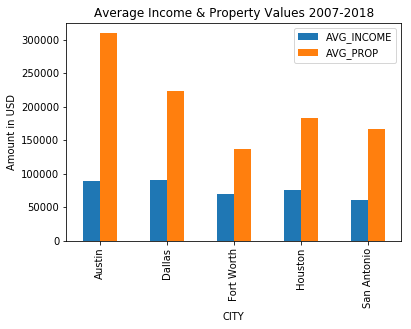

In [6]:
# Dashboard Title
dashboard_title = "# Real Estate & Income 2007-2018 for major Texas cities"

summary = pn.Row(city_avg_inc_prop())
welcome = pn.Column(
    """Text for summary""",
    summary
)

# AGI_v_prop = pn.Column(
#     zall_agi_v_prop(),
#     zcon_agi_v_prop(),
#     rsna_agi_v_prop()
# )

# choropleth = pn.Tabs(
#     ("ZALL", most_expensive_neighborhoods_rent_sales()),
#     ("Condos", average_price_by_neighborhood()),
#     ("Rentals", average_rent_by_neighborhood())
# )


# parallel= pn.Row(parallel_coordinates(), parallel_categories())
# sun = pn.Row(sunburst())
# cost = pn.Tabs(
#     ("Parallel Plots", parallel),
#     ("Sunburst Plot", sun)
# )

In [7]:
# Tab layout (pn.Tabs)
sf_real_est = pn.Tabs(
    ("Avg/Time", welcome),
    ("AGI vs Prop", AGI_v_prop),
    ("Opportunity Ratio", neigh),
    ("Mapbox", cost),
    ("Choropleth", choropleth)
)
sf_dash = pn.Column(dashboard_title, sf_real_est) 

In [8]:
# housing_units_per_year()
# average_gross_rent()
# average_sales_price()
# average_price_by_neighborhood()
# top_most_expensive_neighborhoods()
# most_expensive_neighborhoods_rent_sales()
# neighborhood_map().show()
# parallel_categories()
# parallel_coordinates()

Column
    [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Row
                [0] Plotly(Figure)
                [1] HoloViews(Bars)
        [1] Row
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
            [2] Matplotlib(Figure)
        [2] Tabs
            [0] Row(name='Rent v Sales')
                [0] HoloViews(DynamicMap, name='Rent v Sales')
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
            [1] Row(name='Sales')
                [0] HoloViews(DynamicMap, name='Sales')
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
            [2] Row(name='Rent')
                [0] HoloViews(DynamicMap, name='Rent')
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
        [3] Tabs
            [0] Row
                [0] Plotly(Figure)
                [1] Plotly(Figure)
            [1] Row
                [0] Plotly(Figure)
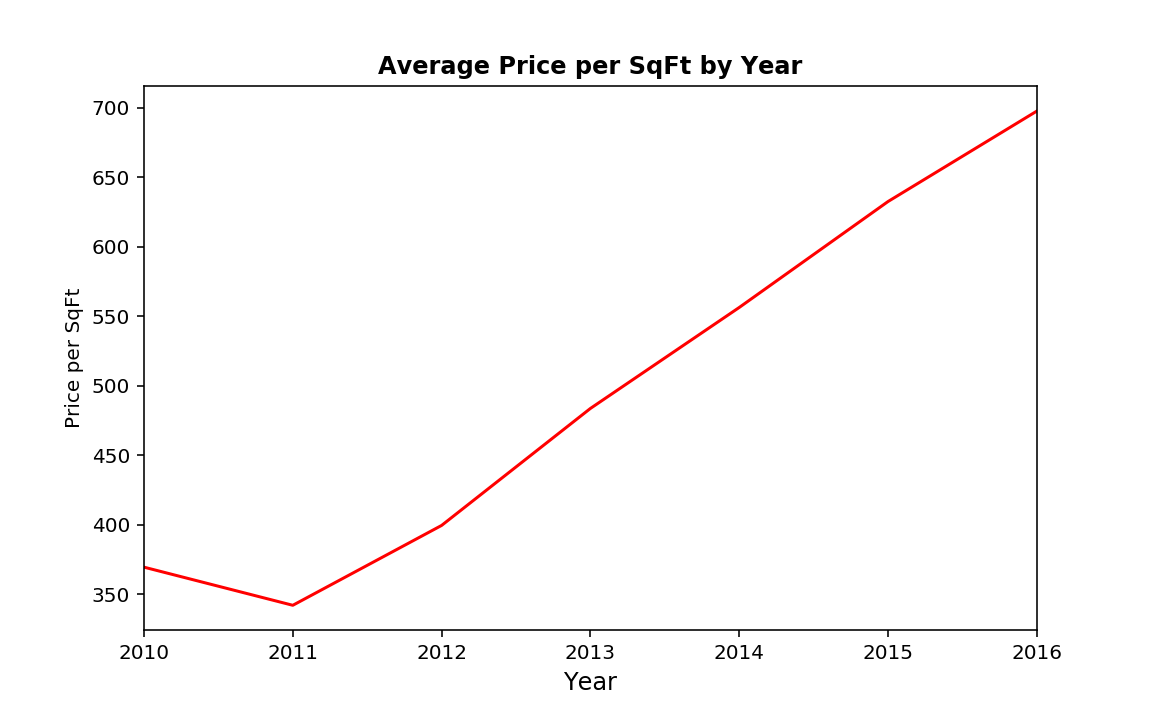
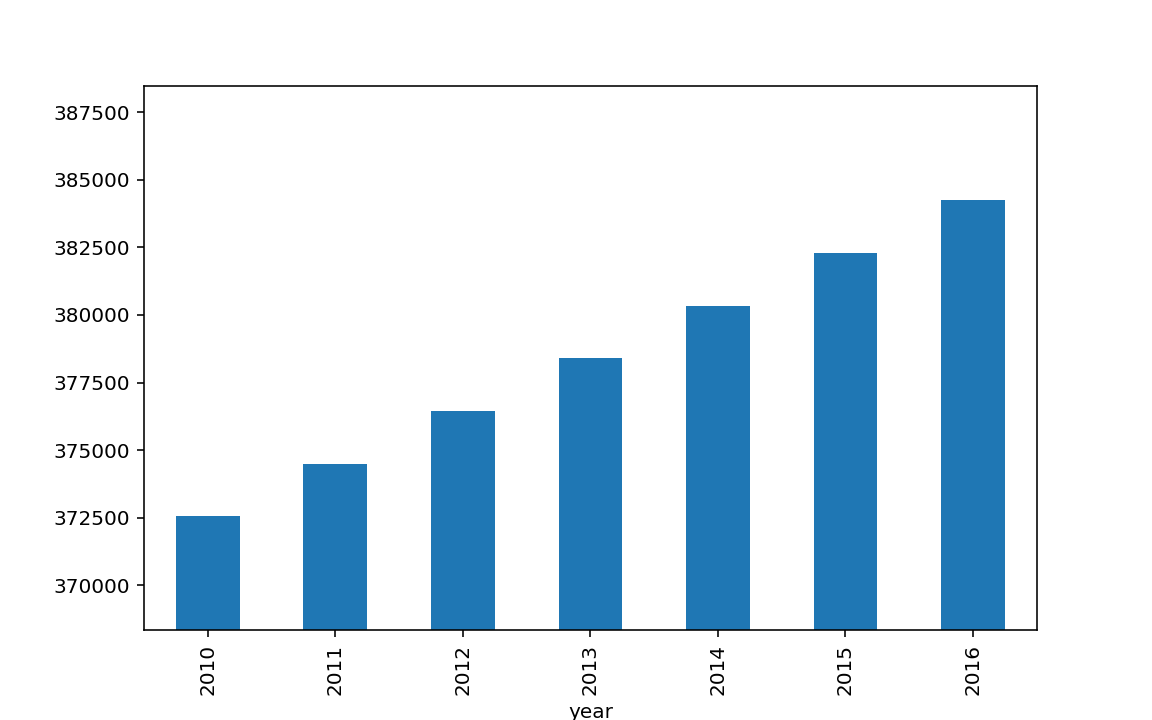
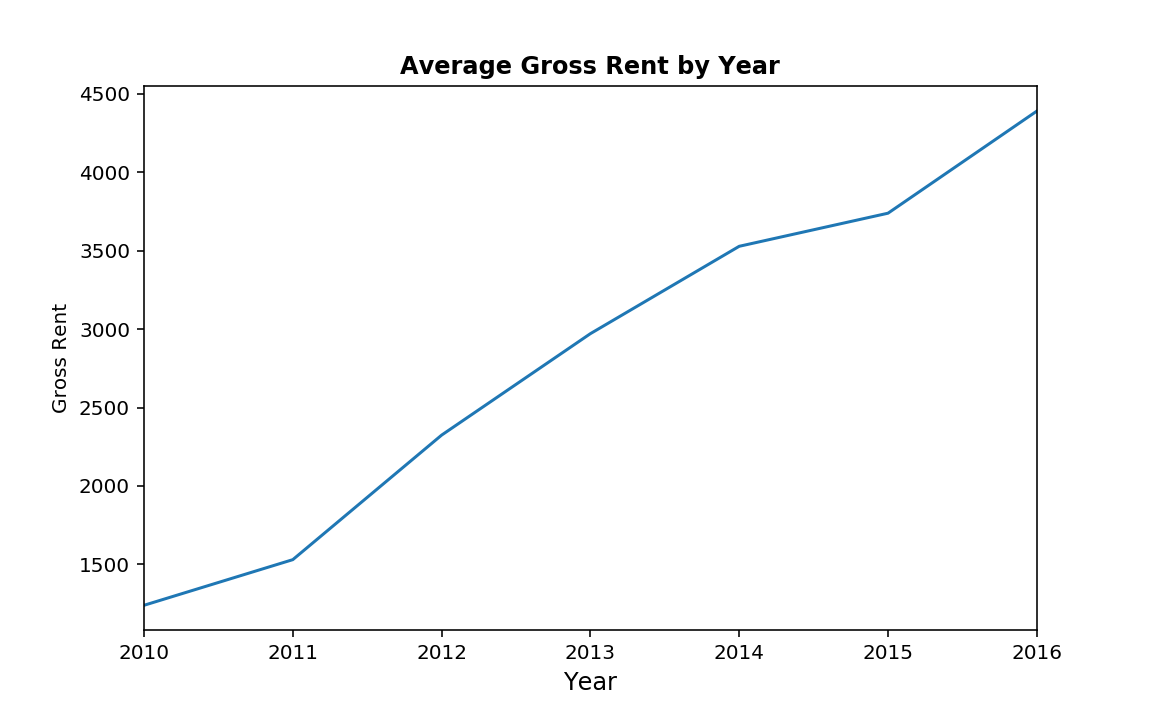

In [9]:
# Execute using servable
sf_dash.servable()